# Preprocessing All Known Datasets

In [39]:
%matplotlib inline
import pandas as pd
from tqdm import tqdm_notebook
import dask.dataframe as dd
import dask
import multiprocessing
nb_cores = multiprocessing.cpu_count()
from pythainlp.tokenize import word_tokenize

## `wongnai-corpus`

In [8]:
train = pd.read_csv('raw_data/wongnai_corpus/w_review_train.csv',header=None,sep=';')
test = pd.read_csv('raw_data/wongnai_corpus/test_file.csv',sep=';')
train.shape, test.shape

((40000, 2), (6203, 2))

In [9]:
train.head()

,0,1
0,ร้านอาหารใหญ่มากกกกกกก \nเลี้ยวเข้ามาเจอห้องน้...,3
1,อาหารที่นี่เป็นอาหารจีนแคะที่หากินยากในบ้านเรา...,4
2,ปอเปี๊ยะสด ทุกวันนี้รู้สึกว่าหากินยาก (ร้านที่...,3
3,รัานคัพเค้กในเมืองไทยมีไม่มาก หลายๆคนอาจจะสงสั...,5
4,อร่อย!!! เดินผ่านDigital gatewayทุกวัน ไม่ยักร...,5


In [41]:
texts = pd.concat([train.iloc[:,0],test.iloc[:,1]]).reset_index(drop=True)
nb_tokens = texts.map(lambda x: len(word_tokenize(x))).reset_index(drop=True)
texts.shape, nb_tokens.shape

((46203,), (46203,))

In [49]:
df = pd.DataFrame({'category':'reviews','dataset_name':'wongnai-corpus',
                   'text':texts,'nb_tokens':nb_tokens})
df.head()

,category,dataset_name,text,nb_tokens
0,reviews,wongnai-corpus,ร้านอาหารใหญ่มากกกกกกก \nเลี้ยวเข้ามาเจอห้องน้...,116
1,reviews,wongnai-corpus,อาหารที่นี่เป็นอาหารจีนแคะที่หากินยากในบ้านเรา...,211
2,reviews,wongnai-corpus,ปอเปี๊ยะสด ทุกวันนี้รู้สึกว่าหากินยาก (ร้านที่...,141
3,reviews,wongnai-corpus,รัานคัพเค้กในเมืองไทยมีไม่มาก หลายๆคนอาจจะสงสั...,303
4,reviews,wongnai-corpus,อร่อย!!! เดินผ่านDigital gatewayทุกวัน ไม่ยักร...,80


(7588628, <matplotlib.axes._subplots.AxesSubplot at 0x11aab9400>)

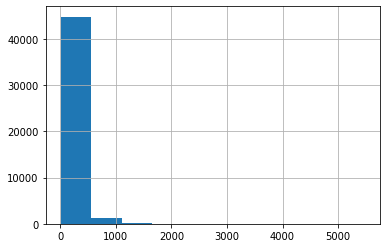

In [48]:
df.nb_tokens.sum(),df.nb_tokens.hist()

In [50]:
df.to_csv('cleaned_data/wongnai_corpus.csv',index=False)

## `prachathai-67k`

In [2]:
df = pd.read_csv('raw_data/prachathai-67k/prachathai-67k.csv')
df_d = dd.from_pandas(df,npartitions=nb_cores*10)
df_d.shape

(Delayed('int-f5930077-61db-454d-b60e-177d7ac3a3b6'), 5)

In [3]:
df_d.tail()

,url,date,title,body_text,labels
67884,https://prachatai.com/print/79624,2018-11-15 12:39,ชราธิปไตยในสังคมพุทธไทย,พุทธศาสนาเถรวาทมีขนบที่ต้องเคารพคนแก่ เพราะเชื...,"['บทความ', 'การเมือง', 'วัฒนธรรม', 'สิทธิมนุษย..."
67885,https://prachatai.com/print/79626,2018-11-15 18:51,เวทีอาเซียนสนใจสถานการณ์โรฮิงญา บังกลาเทศเลื่อ...,ประเด็นวิกฤตชาวโรฮิงญาเป็นที่ถกเถียงในเวทีประช...,"['ข่าว', 'การเมือง', 'สิทธิมนุษยชน', 'ต่างประเ..."
67886,https://prachatai.com/print/79625,2018-11-15 12:47,ยุติวงจรผลัดกันเกาหลัง ด้วยการยื่นบัญชีทรัพย์สินฯ,จากกรณีที่ราชกิจจานุเบกษาได้เผยแพร่ประกาศของคณ...,"['บทความ', 'การเมือง', 'เศรษฐกิจ', 'การยื่นบัญ..."
67887,https://prachatai.com/print/79628,2018-11-15 20:45,รัฐสวัสดิการ 101 กับ ภาคภูมิ แสงกนกกุล : การจั...,ทำความเข้าใจรัฐสวัสดิการแบบ 101 ทั้งความเป็นมา...,"['สัมภาษณ์', 'การเมือง', 'เศรษฐกิจ', 'แรงงาน',..."
67888,https://prachatai.com/print/79629,2018-11-15 21:34,ชาวอุยกูร์ในสหรัฐฯ ชุมนุมวันประกาศเอกราช เรียก...,สืบเนื่องจากเป็นวันประกาศเอกราชของเตอร์กิสถานต...,"['ข่าว', 'สิทธิมนุษยชน', 'ต่างประเทศ', 'อูยกูร..."


In [4]:
%%time
df_d['title_tokens'] = df_d.title.map(lambda x: len(word_tokenize(x)))
df_d['body_text_tokens'] = df_d.body_text.map(lambda x: len(word_tokenize(x)))

CPU times: user 18.8 ms, sys: 2.37 ms, total: 21.2 ms
Wall time: 19.7 ms


In [9]:
%%time
df = df_d.compute()
df.to_csv("raw_data/prachathai-67k/prachathai_tokens.csv",index=False)

CPU times: user 26min 15s, sys: 55.9 s, total: 27min 11s
Wall time: 26min 46s


In [20]:
df = pd.read_csv("cleaned_data/prachathai.csv")
title_df = pd.DataFrame({'category':'news','dataset_name':'prachathai-67k-title',
                   'text':df['title'],'nb_tokens':df['title_tokens']})
title_df.to_csv("cleaned_data/prachathai_title.csv",index=False)
title_df.head()

,category,dataset_name,text,nb_tokens
0,news,prachathai-67k-title,"นักวิจัยหนุน ""แม้ว"" เปิด ""จีเอ็มโอ""",12
1,news,prachathai-67k-title,ภาคประชาชนต้านเปิดเสรีจีเอ็มโอ,6
2,news,prachathai-67k-title,จุฬาฯ ห่วงจีเอ็มโอลามข้าวไทย,7
3,news,prachathai-67k-title,ฟองสบู่การเมืองแตก ทักษิณหมดกึ๋น ชนชั้นกลางหมด...,11
4,news,prachathai-67k-title,กอต.เสนอเลิกถนนคลองลาน-อุ้มผาง,9


In [21]:
body_text_df = pd.DataFrame({'category':'news','dataset_name':'prachathai-67k-body_text',
                   'text':df['body_text'],'nb_tokens':df['body_text_tokens']})
body_text_df.to_csv("cleaned_data/prachathai_body_text.csv",index=False)
body_text_df.head()

,category,dataset_name,text,nb_tokens
0,news,prachathai-67k-body_text,ประชาไท --- 23 ส.ค.2547 นักวิจัยฯ ชี้นโยบายจี...,482
1,news,prachathai-67k-body_text,ประชาไท- 23 ส.ค.2547 นักวิชาการ ภาคประชาชน จ...,621
2,news,prachathai-67k-body_text,นโยบายที่อนุญาตให้ปลูกร่วมกับพืชอื่นได้นั้นถื...,305
3,news,prachathai-67k-body_text,ประชาไท -- 23 ส.ค. 47 ขาประจำทักษิณ ฟันธง ฟอง...,799
4,news,prachathai-67k-body_text,ประชาไท-23 ส.ค.47 คณะกรรมการอนุรักษ์ ผืนป่าตะ...,317


In [23]:
title_df.nb_tokens.sum(),body_text_df.nb_tokens.sum()

(1078087, 93632233)

## `truevoice-intent`

In [27]:
train = pd.read_csv('raw_data/truevoice-intent/mari_train.csv')
test = pd.read_csv('raw_data/truevoice-intent/mari_test.csv')
mari = pd.concat([train,test]).reset_index(drop=True)
mari['nb_tokens'] = mari.texts_deepcut.map(lambda x: len(x.split()))
train.shape, test.shape, mari.shape

((12939, 5), (3236, 5), (16175, 6))

In [28]:
mari.head()

,texts,texts_deepcut,action,object,destination,nb_tokens
0,ผมไปจ่ายเงินที่ Counter Services เค้าเช็ต . บ...,ผม ไป จ่าย เงิน ที่ Counter Services เค้า เช็...,enquire,payment,billing and payment,21
1,internet ยังความเร็วอยุ่เท่าไหร ครับ,internet ยัง ความ เร็ว อยุ่ เท่า ไหร ครับ,enquire,package,promotions,8
2,ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้...,ตะกี้ ไป ชำระ ค่า บริการ ไป แล้ว แต่ ยัง ใช้ ...,report,suspend,billing and payment,14
3,พี่ค่ะยังใช้ internet ไม่ได้เลยค่ะ เป็นเครื่อ...,พี่ ค่ะ ยัง ใช้ internet ไม่ ได้ เลย ค่ะ เป็น...,enquire,internet,internet,12
4,ฮาโหล คะ พอดีว่าเมื่อวานเปิดซิมทรูมูฟ แต่มันโ...,ฮาโหล คะ พอดี ว่า เมื่อ วาน เปิด ซิม ทรูมูฟ แ...,report,phone_issues,billing and payment,20


In [30]:
df = pd.DataFrame({'category':'conversations','dataset_name':'truevoice-intent',
                   'text':mari['texts'],'nb_tokens':mari['nb_tokens']})
df.to_csv("cleaned_data/truevoice_intent.csv",index=False)
df.head()

,category,dataset_name,text,nb_tokens
0,conversations,truevoice-intent,ผมไปจ่ายเงินที่ Counter Services เค้าเช็ต . บ...,21
1,conversations,truevoice-intent,internet ยังความเร็วอยุ่เท่าไหร ครับ,8
2,conversations,truevoice-intent,ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้...,14
3,conversations,truevoice-intent,พี่ค่ะยังใช้ internet ไม่ได้เลยค่ะ เป็นเครื่อ...,12
4,conversations,truevoice-intent,ฮาโหล คะ พอดีว่าเมื่อวานเปิดซิมทรูมูฟ แต่มันโ...,20


In [31]:
df.nb_tokens.sum()

183929

## `wisesight-sentiment`

In [40]:
with open('raw_data/wisesight-sentiment/neg.txt','r') as f: neg = f.readlines()
with open('raw_data/wisesight-sentiment/neu.txt','r') as f: neu = f.readlines()
with open('raw_data/wisesight-sentiment/pos.txt','r') as f: pos = f.readlines()
with open('raw_data/wisesight-sentiment/q.txt','r') as f: q = f.readlines()
all_msg = neg + neu + pos + q
len(all_msg)

26737

In [41]:
df = pd.DataFrame({'category':'social','dataset_name':'wisesight-sentiment',
                   'text':all_msg, 'nb_tokens': 0})
df.tail()

,category,dataset_name,text,nb_tokens
26732,social,wisesight-sentiment,วิธีซื้อรถมือสองต้องดูยังไงดีครับตอนนั้นพีจิมแ...,0
26733,social,wisesight-sentiment,- น้ำมันเครื่อง ทั้ง Fully / Semi เบนซิน - น้ำ...,0
26734,social,wisesight-sentiment,Honda Civic Hatchback ที่มากับสีแดง ราคาเท่าเด...,0
26735,social,wisesight-sentiment,กำลังจะเริ่ม skincare 2 ตัวคือ stemfactor กับ ...,0
26736,social,wisesight-sentiment,พี่คะ หนูอยากสอบถามเรื่องนึงค่ะ อาจะไม่เกี่ยวก...,0


In [42]:
df_d = dd.from_pandas(df,npartitions=nb_cores*10)
df_d.shape

(Delayed('int-fe960c41-6df6-4c71-9970-941a62d908ba'), 4)

In [43]:
df_d['nb_tokens'] = df_d.text.map(lambda x: len(word_tokenize(x)))

In [44]:
%%time
df_save = df_d.compute()
df_save.to_csv("cleaned_data/wisesight_sentiment.csv",index=False)

CPU times: user 7.58 s, sys: 433 ms, total: 8.01 s
Wall time: 8.19 s


In [47]:
df_save.nb_tokens.sum()

754319

## `thwiki`

Run `prepare_wiki_th.sh`.

In [96]:
lines = []
nb_tokens = []
with open('raw_data/thwiki/wiki/th-all/th.wiki.test.tokens') as f:
    for l in tqdm_notebook(f.readlines()):
        nb_token=len(word_tokenize(l))
        if nb_token>1:
            lines.append(l[:-1])
            nb_tokens.append(nb_token-1)
test = pd.DataFrame({'category':'encyclopedia','dataset_name':'thwiki',
                   'text':lines, 'nb_tokens': nb_tokens})
test.tail()

,category,dataset_name,text,nb_tokens
4432,encyclopedia,thwiki,อ้างอิง,1
4433,encyclopedia,thwiki,BUDSIR VI (พระไตรปิฎกฉบับคอมพิวเตอร์ มหาวิทยาล...,11
4434,encyclopedia,thwiki,- พระไตรปิฎก ภาษาไทย เล่มที่ ๔ (วินัยปิฎก มหาว...,27
4435,encyclopedia,thwiki,- พระไตรปิฎก ภาษาไทย เล่มที่ ๑๘ (สังยุตตนิกาย ...,27
4436,encyclopedia,thwiki,อรรถกถา ดูที่ พระไตรปิฎกและอรรถกถาแปล (ชุด ๙๑ ...,24


In [97]:
lines = []
nb_tokens = []
with open('raw_data/thwiki/wiki/th-all/th.wiki.valid.tokens') as f:
    for l in tqdm_notebook(f.readlines()):
        nb_token=len(word_tokenize(l))
        if nb_token>1:
            lines.append(l[:-1])
            nb_tokens.append(nb_token-1)
valid = pd.DataFrame({'category':'encyclopedia','dataset_name':'thwiki',
                   'text':lines, 'nb_tokens': nb_tokens})
valid.tail()

,category,dataset_name,text,nb_tokens
3200,encyclopedia,thwiki,"""Sentinels of Silence""",7
3201,encyclopedia,thwiki,"Section::::Best Documentary, Features.",9
3202,encyclopedia,thwiki,"""The Hellstrom Chronicle""",7
3203,encyclopedia,thwiki,Section::::Best Foreign Language Film.,10
3204,encyclopedia,thwiki,"""The Garden of the Finzi-Continis - Italy""",15


In [98]:
valid.head()

,category,dataset_name,text,nb_tokens
0,encyclopedia,thwiki,ด็อก เดย์ อาฟเตอร์นูน,6
1,encyclopedia,thwiki,ด็อก เดย์ อาฟเตอร์นูน (Dog Day Afternoon) ชื่อ...,93
2,encyclopedia,thwiki,"ภาพยนตร์ได้แรงบันดาลใจมาจากบทความชื่อ ""The Boy...",136
3,encyclopedia,thwiki,ภาพยนตร์ได้ดัดแปลงชื่อตัวเอก เป็น ซันนี (Sonny...,47
4,encyclopedia,thwiki,ภาพยนตร์ได้รับการเสนอชื่อเข้าชิงรางวัลออสการ์แ...,21


In [100]:
lines = []
nb_tokens = []
with open('raw_data/thwiki/wiki/th-all/th.wiki.train.tokens') as f:
    for l in tqdm_notebook(f.readlines()):
        nb_token=len(word_tokenize(l))
        if nb_token>1:
            lines.append(l[:-1])
            nb_tokens.append(nb_token-1)
train = pd.DataFrame({'category':'encyclopedia','dataset_name':'thwiki',
                   'text':lines, 'nb_tokens': nb_tokens})
train.tail()

,category,dataset_name,text,nb_tokens
936734,encyclopedia,thwiki,น้ำมันเมล็ดทานตะวันแบบมีกรดโอเลอิกสูงมีไขมันไม...,22
936735,encyclopedia,thwiki,ส่วนน้ำมันเมล็ดผักกาด (Canola oil) และมะม่วงหิ...,25
936736,encyclopedia,thwiki,ไขมันวัวเป็นไขมันไม่อิ่มตัวแบบมีพันธะคู่เดี่ยว...,12
936737,encyclopedia,thwiki,และมันหมู 40%,6
936738,encyclopedia,thwiki,แหล่งอาหารอื่นรวมทั้งน้ำมันอาโวคาโด น้ำมันแมคา...,58


In [102]:
df = pd.concat([train,valid,test]).reset_index(drop=True)
df.to_csv('cleaned_data/thwiki.csv',index=False)
df.shape

(944381, 4)

In [105]:
df.head()

,category,dataset_name,text,nb_tokens
0,encyclopedia,thwiki,แคนแคน,2
1,encyclopedia,thwiki,"แคนแคน (ก็องก็อง แปลว่า ""อื้อฉาว) เป็นรูปแบบกา...",81
2,encyclopedia,thwiki,ดนตรีที่ใช้ประกอบการเต้น มักใช้เพลงกาล็อพ (gal...,69
3,encyclopedia,thwiki,การเต้นแบบแคนแคนเกิดขึ้นครั้งแรกราวทศวรรษ 1830...,121
4,encyclopedia,thwiki,การเต้นแคนแคนที่มูแลงรูจเป็นที่นิยมจนถึงทศวรรษ...,70


In [104]:
df.nb_tokens.sum()

50920274

## `OpenSubtitles`

In [110]:
lines = []
nb_tokens = []
with open('raw_data/opensubtitles/OpenSubtitles.en-th.th') as f:
    for l in tqdm_notebook(f.readlines()):
        nb_token=len(word_tokenize(l))
        if nb_token>1:
            lines.append(l[:-1])
            nb_tokens.append(nb_token-1)
df = pd.DataFrame({'category':'conversations','dataset_name':'opensubtitles',
                   'text':lines, 'nb_tokens': nb_tokens})
df.tail()

,category,dataset_name,text,nb_tokens
3281528,conversations,opensubtitles,นั่นก็เพราะว่า ผมต้องการให้มันเป็นอย่างนั้น,9
3281529,conversations,opensubtitles,(เหล่าสุภาพสตรีของผม โดย มิชิมะ ชิน),14
3281530,conversations,opensubtitles,(ภาพยนตร์ชุดนี้เป็นเรื่องแต่ง),7
3281531,conversations,opensubtitles,(ตัวละครและองค์กรในเรื่อง ล้วนเป็นเรื่องแต่ง),11
3281532,conversations,opensubtitles,คำบรรยายโดย:,3


In [113]:
df.to_csv('cleaned_data/opensubtitles.csv',index=False)
df.shape,df.nb_tokens.sum()

((3281533, 4), 27112493)

## `QED`

In [130]:
lines = []
nb_tokens = []
with open('raw_data/qed/QED.en-th.th') as f:
    for l in tqdm_notebook(f.readlines()):
        nb_token=len(word_tokenize(l))
        if nb_token>1:
            lines.append(l[:-1])
            nb_tokens.append(nb_token-1)
df = pd.DataFrame({'category':'conversations','dataset_name':'qed',
                   'text':lines, 'nb_tokens': nb_tokens})
df.tail()

,category,dataset_name,text,nb_tokens
264672,conversations,qed,ดังนั้นไม่มีทางที่บทพิสูจน์นี้จะวนตัวเอง,9
264673,conversations,qed,เอาล่ะ ผมไม่อยากปกป้องตัวเอง แต่ผม อยากทำให้ทุ...,15
264674,conversations,qed,เพราะผมอยากให้ใครว่าคนที่คิดว่า บทพิสูจน์เดิมข...,18
264675,conversations,qed,ผมผิดเองที่ไม่ได้อธิบายให้ชัด,9
264676,conversations,qed,งั้นหวังว่านี่คงช่วย ให้เรื่องนี้กระจ่างขึ้น -,14


In [131]:
df.to_csv('cleaned_data/qed.csv',index=False)
df.shape,df.nb_tokens.sum()

((264677, 4), 4177033)

## `tatoeba`

In [132]:
lines = []
nb_tokens = []
with open('raw_data/tatoeba/Tatoeba.en-th.th') as f:
    for l in tqdm_notebook(f.readlines()):
        nb_token=len(word_tokenize(l))
        if nb_token>1:
            lines.append(l[:-1])
            nb_tokens.append(nb_token-1)
df = pd.DataFrame({'category':'conversations','dataset_name':'tatoeba',
                   'text':lines, 'nb_tokens': nb_tokens})
df.tail()

,category,dataset_name,text,nb_tokens
1076,conversations,tatoeba,เราไม่สามารถทำสิ่งนั้นได้ในตอนนี้,9
1077,conversations,tatoeba,ใครซักเสื้อผ้าของคุณให้คุณ,7
1078,conversations,tatoeba,คุณคิดค่าบริการฉันเท่าไรสำหรับการซักรีดให้ฉัน,9
1079,conversations,tatoeba,คุณซักรีดเสื้อผ้าของตัวเองหรือไม่?,7
1080,conversations,tatoeba,ฉันกำลังมองหาคนซักเสื้อผ้าสำหรับฉัน,8


In [133]:
df.to_csv('cleaned_data/tatoeba.csv',index=False)
df.shape,df.nb_tokens.sum()

((1081, 4), 6294)

## `bible-uedin`

In [136]:
lines = []
nb_tokens = []
with open('raw_data/bible_uedin/bible-uedin.en-th.th') as f:
    for l in tqdm_notebook(f.readlines()):
        nb_token=len(word_tokenize(l))
        if nb_token>1:
            lines.append(l[:-1])
            nb_tokens.append(nb_token-1)
df = pd.DataFrame({'category':'religious','dataset_name':'bible-uedin',
                   'text':lines, 'nb_tokens': nb_tokens})
df.tail()

,category,dataset_name,text,nb_tokens
124381,religious,bible-uedin,การชวนเชิญครั้งสุดท้ายของพระคัมภีร์ต่อคนบาปพระ...,61
124382,religious,bible-uedin,ข้าพเจ้าเป็นพยานแก่ทุกคนที่ได้ยินคำพยากรณ์ในหน...,39
124383,religious,bible-uedin,และถ้าผู้ใดตัดข้อความออกจากหนังสือพยากรณ์นี้ พ...,49
124384,religious,bible-uedin,คำทรงเตือนและพระสัญญาว่าพระคริสต์จะเสด็จมาพระอ...,47
124385,religious,bible-uedin,ขอให้พระคุณแห่งพระเยซูคริสต์องค์พระผู้เป็นเจ้า...,19


In [137]:
df.to_csv('cleaned_data/bible_uedin.csv',index=False)
df.shape,df.nb_tokens.sum()

((124386, 4), 5938685)

## `tanzil`

In [138]:
lines = []
nb_tokens = []
with open('raw_data/tanzil/Tanzil.en-th.th') as f:
    for l in tqdm_notebook(f.readlines()):
        nb_token=len(word_tokenize(l))
        if nb_token>1:
            lines.append(l[:-1])
            nb_tokens.append(nb_token-1)
df = pd.DataFrame({'category':'religious','dataset_name':'tanzil',
                   'text':lines, 'nb_tokens': nb_tokens})
df.tail()

,category,dataset_name,text,nb_tokens
93535,religious,tanzil,พระราชาแห่งมนุษย์ชาติ,4
93536,religious,tanzil,พระเป็นเจ้าแห่งมนุษย์ชาติ,4
93537,religious,tanzil,ให้พ้นจากความชั่วร้ายของผู้กระซิบกระซาบที่หลอกล่อ,10
93538,religious,tanzil,ที่กระซิบกระซาบในหัวอกของมนุษย์,6
93539,religious,tanzil,จากหมู่ญินและมนุษย์,5


In [139]:
df.to_csv('cleaned_data/tanzil.csv',index=False)
df.shape,df.nb_tokens.sum()

((93540, 4), 3439230)